# Day 16
## Imports and settings

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

myfile = 'test2.txt'

## Import data
Get the data from a file and structure it in a dictionary
Then sort by valve and give an ID to facilitate the graph build

In [2]:
with open(myfile, 'r') as file:
    lines = file.readlines()

valves = dict()
for line in lines:
    name = line.split()[1]
    flowrate = int(re.findall(r'[0-9]+',line)[0])
    coupled = re.findall(r'[A-Z][A-Z]',line.split(';')[1])
    valves[name] = {'flowrate': flowrate, 'coupled': coupled}

max_valve = len(valves)
print(f'Nodes found: {sorted(valves)}, total number: {max_valve}')

valve_relief = np.zeros((max_valve,))
for i,n in enumerate(sorted([v for v in valves])):
    valves[n]['id'] = i
    valve_relief[i] = valves[n]['flowrate']


Nodes found: ['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ'], total number: 10


## Create a network of pipelines/valves


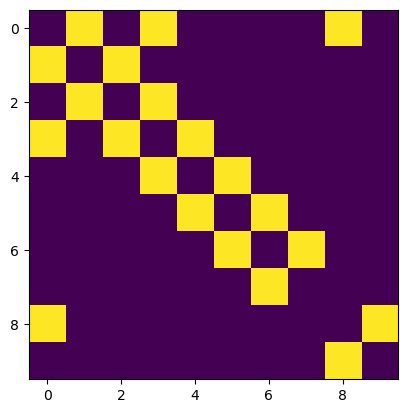

In [3]:
graph = np.zeros((max_valve,max_valve))
for v in sorted(valves):
    vi = int(valves[v]['id'])
    for c in valves[v]['coupled']:
        ci = int(valves[c]['id'])
        # print(f"From valve {v} (ID: {valves[v]['id']}) you can move to valve {c} (ID: {valves[c]['id']})")
        graph[vi][ci] = 1

plt.imshow(graph)

In [5]:
# Pressure relief testing
t = 30
current_valve = 'AA'

while t > 0:
    dist_matrix, predecessors = dijkstra(csgraph=graph, directed=False, indices=valves[current_valve]['id'], return_predecessors=True)
    
    projected_add_relief = (t-dist_matrix) * valve_relief
    move_to = np.argmax(projected_add_relief)
    

    # for v in sorted(valves):
    #     vi = int(valves[v]['id'])  
    #     # for c in valves[v]['coupled']:
    t -= 1